<a href="https://colab.research.google.com/github/Unsimplegato159/Labs-TDS-3/blob/Lab-%231/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratorio 1 - Enventanado y Segmentacion

**Autores:**  

*   Santiago Torres Velásquez
*   Santiago Narváez Toro

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**


**Modalidad de trabajo:** Implementación de código en un cuaderno (.ipynb), a través de Google Colab.

1. Descargue las siguientes señales de audio, y establezca la frecuencia de muestreo y número de datos:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.io.wavfile as waves
import os
import random

from IPython.display import Audio
from scipy import signal
from scipy.io.wavfile import read, write
from scipy.signal import resample

# Descargar audios
!wget 'https://www.osaka-kyoiku.ac.jp/~masako/exp/kichu/urawaza/C4.wav'
!wget 'https://www.osaka-kyoiku.ac.jp/~masako/exp/kichu/urawaza/D5.wav'
!wget 'https://www.osaka-kyoiku.ac.jp/~masako/exp/kichu/urawaza/G4.wav'

--2023-08-17 00:26:25--  https://www.osaka-kyoiku.ac.jp/~masako/exp/kichu/urawaza/C4.wav
Resolving www.osaka-kyoiku.ac.jp (www.osaka-kyoiku.ac.jp)... 150.86.250.13, 2001:2f8:1015:fa::d
Connecting to www.osaka-kyoiku.ac.jp (www.osaka-kyoiku.ac.jp)|150.86.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 282786 (276K) [audio/x-wav]
Saving to: ‘C4.wav’

C4.wav              100%[===================>] 276.16K   306KB/s    in 0.9s    

2023-08-17 00:26:28 (306 KB/s) - ‘C4.wav’ saved [282786/282786]

--2023-08-17 00:26:28--  https://www.osaka-kyoiku.ac.jp/~masako/exp/kichu/urawaza/D5.wav
Resolving www.osaka-kyoiku.ac.jp (www.osaka-kyoiku.ac.jp)... 150.86.250.13, 2001:2f8:1015:fa::d
Connecting to www.osaka-kyoiku.ac.jp (www.osaka-kyoiku.ac.jp)|150.86.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256286 (250K) [audio/x-wav]
Saving to: ‘D5.wav’

D5.wav              100%[===================>] 250.28K   278KB/s    in 0.9s    

2023-

2. Visualice las señales de audio en dos gráficas, una que muestre la señal completa, y otra que muestre la señal en una ventana de 50 milisegundos, ¿qué propiedades presentan los datos observados? ¿podría decirse que estas se˜nales son estacionarias?


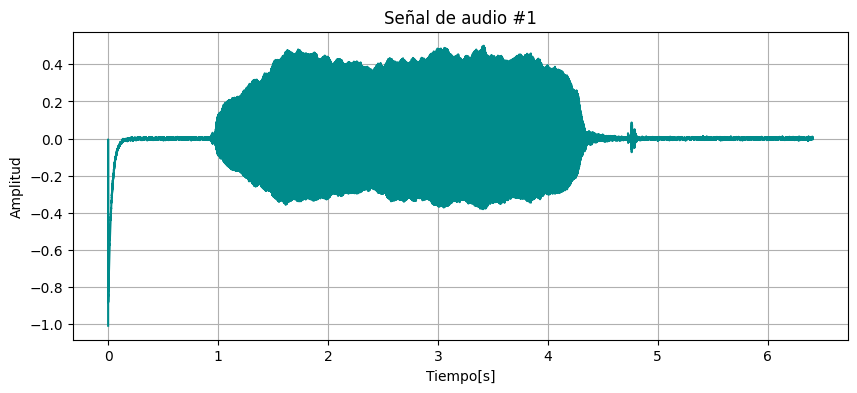


Para la señal #1, la frecuencia de muestreo es de 22050 Hz, con 141364 datos



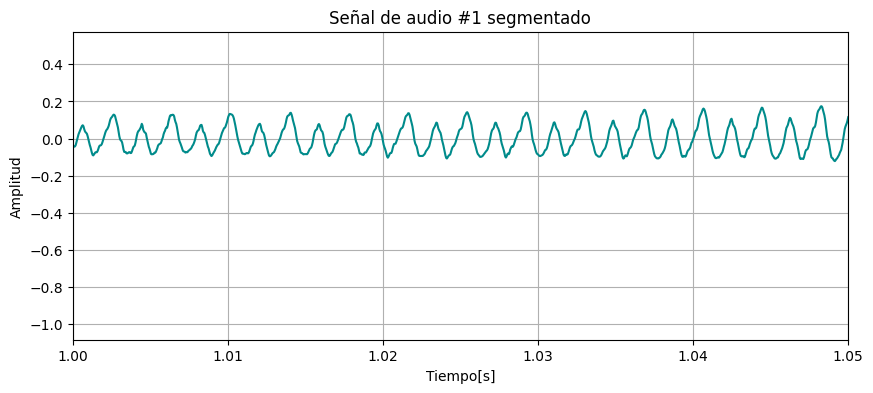

In [3]:
# Señal de audio 1.
file_audio_1=('C4.wav') # Ruta del archivo con la señal
fs_1, audio_1=read(file_audio_1) # Cargar el archivo
sig_1=audio_1/max(abs(audio_1)) #Audio normalizado
t_1=np.arange(0,len(sig_1)/fs_1,1.0/fs_1)

plt.figure(figsize=(10,4))
plt.plot(t_1,sig_1,color = "#008B8B")

plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud")
plt.title("Señal de audio #1")

plt.grid()
plt.show()

print ("\nPara la señal #1, la frecuencia de muestreo es de {} Hz, con {} datos\n".format(fs_1,len(audio_1)))

#----------------------------------------#
#Segmento de 50 ms

plt.figure(figsize=(10,4))
plt.plot(t_1,sig_1,color = "#008B8B")

plt.title("Señal de audio #1 segmentado")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud")
plt.xlim((1,1.05))

plt.grid()
plt.show()
print ("\n")
Audio(sig_1, rate=fs_1)



En este caso, podemos realizar una comparación entre la señal de audio completa y la señal después del enventanado. Ambas representaciones son claramente no estacionarias, lo que significa que sus características y propiedades cambian a lo largo del tiempo. Al observar la señal completa, podemos notar las variaciones en la amplitud y frecuencia de la onda a lo largo del audio.

Por otro lado, cuando aplicamos el enventanado a la señal de audio, estamos dividiendo la señal en segmentos más cortos y suavizando las transiciones entre ellos. Esta técnica es especialmente útil para analizar señales que cambian rápidamente con el tiempo. Al enfocarnos en una ventana más pequeña, podemos apreciar mejor detalles locales y patrones en la señal, que podrían pasar desapercibidos en la vista completa. La suavización de las curvas finales en el enventanado es un resultado esperado debido a la naturaleza del proceso. Esta suavización resalta la evolución gradual de la señal a medida que avanzamos en el tiempo, donde podemos considerar esta señal como una señal localmente estacionaria.

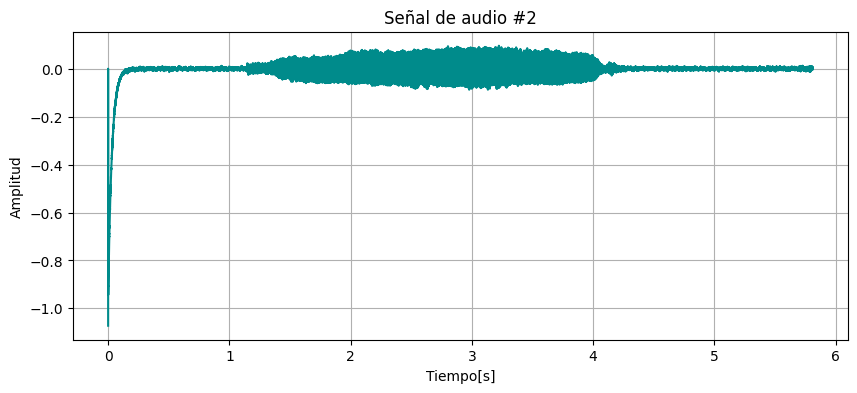


Para la señal #2, la frecuencia de muestreo es de 22050 Hz, con 128114 datos



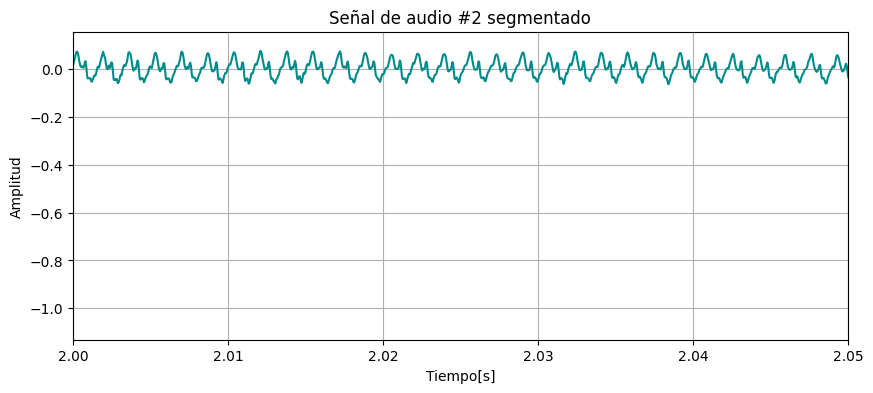

In [4]:
# Señal de audio 2.
file_audio_2=('D5.wav') # Ruta del archivo con la señal
fs_2, audio_2=read(file_audio_2) # Cargar el archivo
sig_2=audio_2/max(abs(audio_2)) #Audio normalizado
t_2=np.arange(0,len(sig_2)/fs_2,1.0/fs_2)

plt.figure(figsize=(10,4))
plt.plot(t_2,sig_2,color = "#008B8B")

plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud")
plt.title("Señal de audio #2")

plt.grid()
plt.show()

print ("\nPara la señal #2, la frecuencia de muestreo es de {} Hz, con {} datos\n".format(fs_2,len(audio_2)))
Audio(sig_2, rate=fs_2)

#----------------------------------------#
#Segmento de 50 ms

plt.figure(figsize=(10,4))
plt.plot(t_2,sig_2,color = "#008B8B")

plt.title("Señal de audio #2 segmentado")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud")
plt.xlim((2,2.05))

plt.grid()
plt.show()
print ("\n")
Audio(sig_2, rate=fs_2)

De manera análoga a la gráfica anterior, el audio 2 es una señal no estacionaria, pues esta varía en el tiempo. Al realizar el enventanado, se puede ver que esta no cambia en el tiempo y que se mantiene la misma amplitud y la misma frecuencia, por lo que en este caso también podemos concluir que en este enventanado la señal es localmente estacionaria.

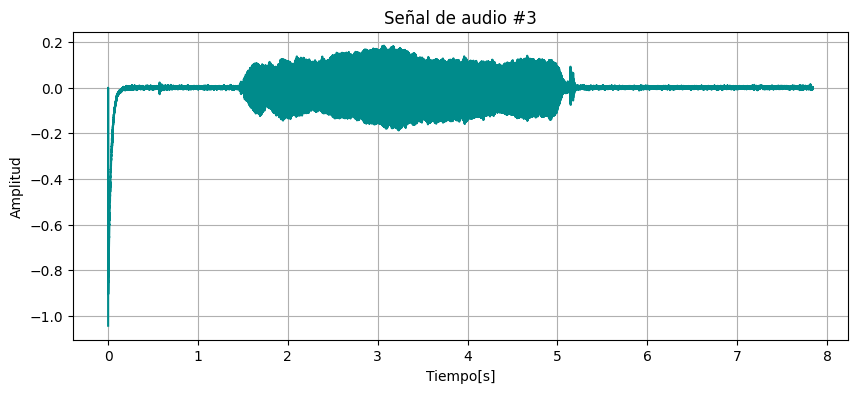


Para la señal #3, la frecuencia de muestreo es de 22050 Hz, con 172900 datos



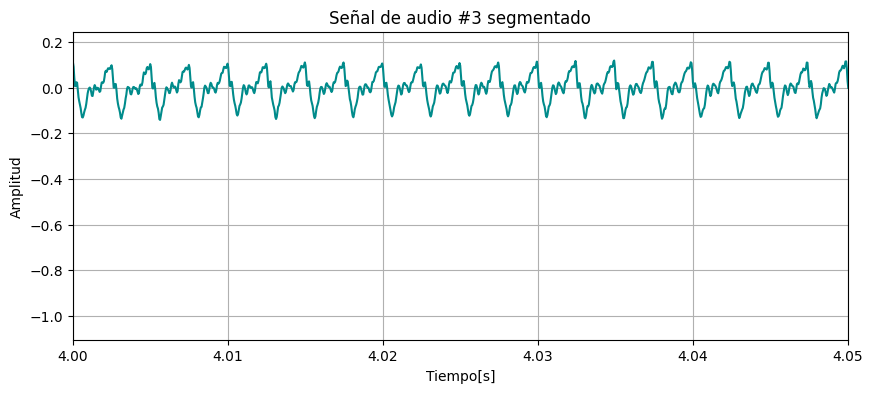

In [5]:
# Señal de audio 3.
file_audio_3=('G4.wav') # Ruta del archivo con la señal
fs_3, audio_3=read(file_audio_3) # Cargar el archivo
sig_3=audio_3/max(abs(audio_3)) #Audio normalizado
t_3=np.arange(0,len(sig_3)/fs_3,1.0/fs_3)

plt.figure(figsize=(10,4))
plt.plot(t_3,sig_3,color = "#008B8B")

plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud")
plt.title("Señal de audio #3")

plt.grid()
plt.show()

print ("\nPara la señal #3, la frecuencia de muestreo es de {} Hz, con {} datos\n".format(fs_3,len(audio_3)))
Audio(sig_3, rate=fs_3)

#----------------------------------------#
#Segmento de 50 ms

plt.figure(figsize=(10,4))
plt.plot(t_3,sig_3,color = "#008B8B")

plt.title("Señal de audio #3 segmentado")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud")
plt.xlim((4,4.05))

plt.grid()
plt.show()
print ("\n")
Audio(sig_3, rate=fs_3)

El audio 3 al igual que los audios anteriores, es una señal no estacionaria, pues varía en el tiempo. Al realizar el enventanado, se puede apreciar que hay pequeñas variaciones en la amplitud y el suavizado de algunos puntos de la gráfica, pero se podría considerar como una señal localmente estacionaria.

Concluimos entonces que cuando enventanamos una señal no estacionaria, dividimos la señal en partes más pequeñas. A medida que cambiamos de una parte a otra, las propiedades generales de la señal pueden cambiar. Sin embargo, dentro de cada ventana más pequeña, es posible que veamos una tendencia más constante en términos de promedio y menos variabilidad en comparación con la señal completa. Esto se debe a que el enventanado "captura" momentos locales en los que la señal puede parecer más estable y menos cambiante.

3. Escriba una función que realice la segmentación (enventanado) de una señal de longitud N y frecuencia de muestreo fs, utilizando ventanas de longitud L y traslape P. La función debe permitir escoger entre cuatro tipos de ventanas, incluyendo las ventanas Rectangular, y Hann. Para cada ventana, muestre en
una gráfica alguno de los segmentos obtenidos. ¿Qué puede concluir de estos resultados?

 Ingrese el nombre del audio: C4.wav
 Ingrese la longitud de la ventana en milisegundos: 200
 Ingrese el traslape de la ventana (0-100, es un porcentaje): 50

 Tipos de ventana disponibles:
 1. Ventana Hann
 2. Ventana Rectangular
 3. Ventana Flattop
 4. Ventana Triangular

 Qué ventana desea utilizar?: 3

 Tamaño de la ventana: 4410 muestras
 Traslape: 2205.0 muestras





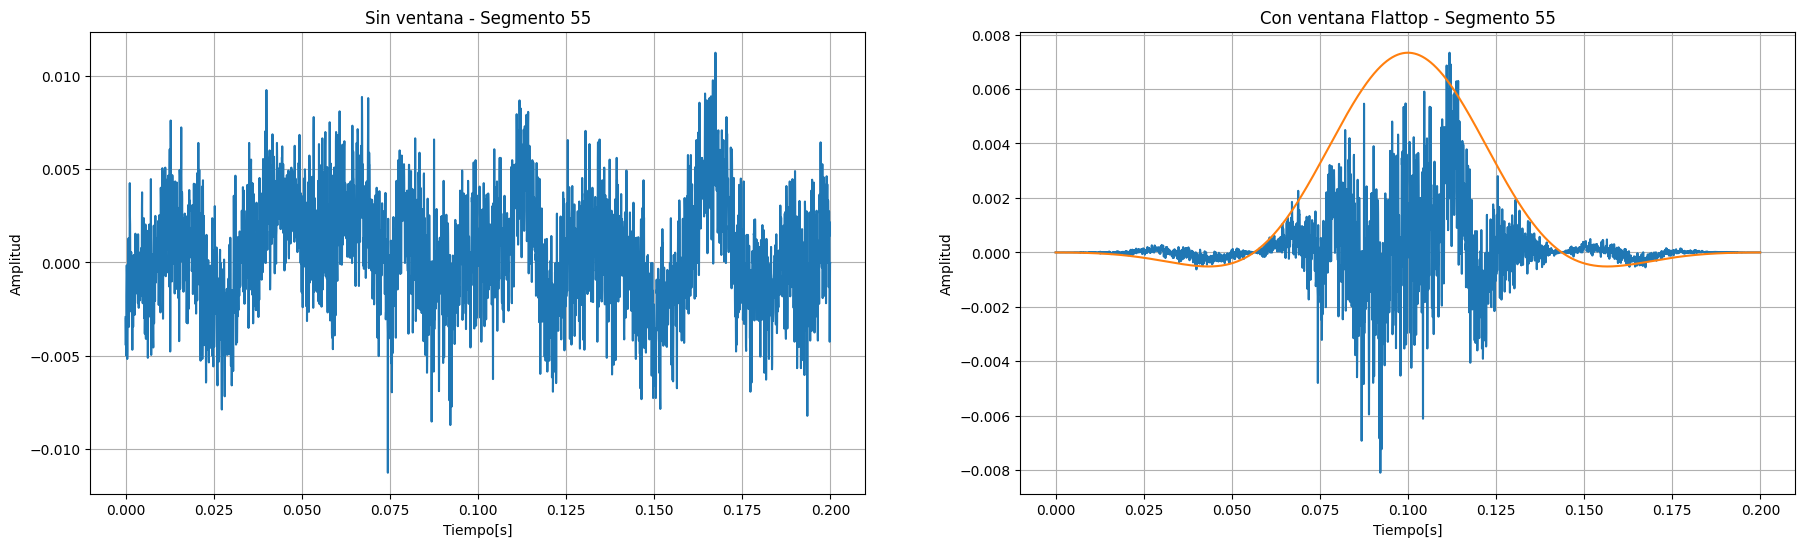

In [27]:
#Funciones para modificar la amplitud de las ventanas con el único propósito de ser mostradas al final superpuestas al resultado.
def scaled_hanning(L, A):
    window = 0.5 - 0.5 * np.cos(2 * np.pi * np.arange(L) / (L - 1))
    scaled_window = A * window
    return scaled_window

def scaled_hamming(L, A):
    window = 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(L) / (L - 1))
    scaled_window = A * window
    return scaled_window

def scaled_bartlett(L, A):
    window = np.bartlett(L)
    scaled_window = A * window
    return scaled_window

def scaled_flattop(L, A):
    window = signal.windows.flattop(L)
    scaled_window = A * window
    return scaled_window

#Función encargada de segmentar la señal, teniendo en cuenta un tamaño de ventana y un solape
def extraer_ventanas(signal, size, fs, P):

    step = int(P) #Tamaño de paso o solape
    n_seg = int((len(signal) - size) / step) #Número de segmentos que se van a extraer.

    windows = [signal[i * step : i * step + size]  #Se extraen los n_seg segmentos, con tamaño L y paso P.
               for i in range(n_seg)]

    #Se pueden usar las siguientes dos lineas para verificar que el solape es el correcto, mostrando los datos de los segmentos 5 y 6.
    #print(windows[5])
    #print(windows[6])

    return np.vstack(windows) # stack (cada fila es una ventana)

#Función que realiza el enventanado de los segmentos de la señal.
def enventanado():

    #Se le solicita al usuario que ingrese el nombre del archivo a enventanar, en caso de no encontrarse en el directorio, se mostrará un error.
    while True:
        signal_s = input(" Ingrese el nombre del audio: ")
        if os.path.exists(signal_s):  # Verificar si el archivo existe en el entorno de Colab
            break  # Salir del bucle si el archivo existe
        else:
            print(" El archivo no existe. Por favor, ingrese un nombre de archivo válido.")

    fs_s, audio_s = read(signal_s) # Cargar el archivo y extraer su frecuencia de muestreo y su contenido
    audio_s=audio_s/max(abs(audio_s)) #Se normaliza el audio
    audio_duration_ms = len(audio_s) / fs_s * 1000  # Duración del audio en milisegundos.


    while True:
            try:
                t_window = float(input(" Ingrese la longitud de la ventana en milisegundos: ")) #Solicitar el tamaño de la ventana en milisegundos
                if t_window > 0 and t_window <= audio_duration_ms:
                    break
                else:
                    print("Por favor, ingrese un número mayor que 0 y menor o igual a la duración del audio.")
            except ValueError:
                print("Por favor, ingrese un número válido.")

    #Se convierte los milisegundos ingresados a número de muestras para poder trabajar
    L_aux = t_window/1000 #Se convierte a segundos
    L = int(fs_s*L_aux) #Al multiplicar los segundos por la frecuencia de muestreo, se obtienen la cantidad de muestras que hay en esos milisegundos ingresados

    while True:
        try:
            P = int(input(" Ingrese el traslape de la ventana (0-100, es un porcentaje): ")) #Solicitar el traslape
            if 0 < P <= 100: #P debe ser no negativo y cómo máximo debe ser igual al tamaño de la ventana.
                P = L*(P/100) #Se convierte P a su respectivo número en relación a L, con base en el porcentaje ingresado.
                break  # Salir del bucle si el valor es válido
            else:
                print("Por favor, ingrese un número mayor que 0 y máximo que sea 100%")
        except ValueError:
            print("Por favor, ingrese un número válido.")

    print ("\n Tipos de ventana disponibles:\n 1. Ventana Hann\n 2. Ventana Rectangular\n 3. Ventana Flattop\n 4. Ventana Triangular")

    #Se verifica que ingrese un número válido para las ventanas disponibles.
    while True:
      try:
          eleccion = int(input("\n Qué ventana desea utilizar?: "))
          if eleccion in [1, 2, 3, 4]:
            break  # Salir del bucle si la entrada es válida
          else:
                print("Por favor, ingrese un número entre 1 y 4.")
      except ValueError:
          print("Por favor, ingrese un número válido.")

    print("\n Tamaño de la ventana: {} muestras".format(L))
    print(" Traslape: {} muestras\n".format(P))

    segmentos = extraer_ventanas(audio_s,L,fs_s,P) #Se llama a la primera función que extrae los segmentos de la señal de audio.
    segment_view = random.randint(0, len(segmentos)) #Número aleatorio para escoger un segmento diferente cada que se ejecute el código.

    #t2 = np.arange(0, float(L_aux-(1.0/fs_s)), 1.0/fs_s) #Vector de tiempo para realizar las gráficas.
    t2 = np.linspace(0, (L - 1) / fs_s, num=L)

    #Si la ventana es la Hanning
    if (eleccion == 1):
      print("\n")
      Hann_window=np.hanning(L) #Se crea la ventana hanning con el tamaño de ventana escogido.
      final = segmentos*Hann_window  #Se hace el enventanado, multiplicando todos los segmentos por la ventana.

      #Se imprimen las figuras con y sin ventana
      plt.figure(figsize=(22,6))

      plt.subplot(1,2,1)
      plt.plot(t2,segmentos[segment_view])
      plt.title('Sin ventana - Segmento {}'.format(segment_view))
      plt.xlabel('Tiempo[s]')
      plt.ylabel('Amplitud')
      plt.grid()

      plt.subplot(1,2,2)
      plt.plot(t2,final[segment_view])
      scaled_hann = scaled_hanning(L, max(final[segment_view])) #Se llama a la ventana re-escalada para que se pueda observar.
      plt.plot(t2,scaled_hann) #Se imprime la ventana re-escalada.
      plt.title('Con ventana Hanning - Segmento {}'.format(segment_view))
      plt.xlabel('Tiempo[s]')
      plt.ylabel('Amplitud')
      plt.grid()

    #Si la ventana es la Rectangular
    if (eleccion == 2):
      print("\n")
      rect_window=np.ones(L)
      final = segmentos*rect_window

      plt.figure(figsize=(22,6))

      plt.subplot(1,2,1)
      plt.plot(t2,segmentos[segment_view])
      plt.title('Sin ventana - Segmento {}'.format(segment_view))
      plt.xlabel('Tiempo[s]')
      plt.ylabel('Amplitud')
      plt.grid()

      plt.subplot(1,2,2)
      plt.plot(t2,final[segment_view])
      plt.title('Con ventana Rectangular - Segmento {}'.format(segment_view))
      plt.xlabel('Tiempo[s]')
      plt.ylabel('Amplitud')
      plt.grid()

    #Si la ventana es la Flattop
    if (eleccion == 3):
      print("\n")
      flattop_window=signal.windows.flattop(L)
      final = segmentos*flattop_window

      plt.figure(figsize=(22,6))

      plt.subplot(1,2,1)
      plt.plot(t2,segmentos[segment_view])
      plt.title('Sin ventana - Segmento {}'.format(segment_view))
      plt.xlabel('Tiempo[s]')
      plt.ylabel('Amplitud')
      plt.grid()

      plt.subplot(1,2,2)
      plt.plot(t2,final[segment_view])
      scaled_flat = scaled_flattop(L, max(final[segment_view]))
      plt.plot(t2,scaled_flat)
      plt.title('Con ventana Flattop - Segmento {}'.format(segment_view))
      plt.xlabel('Tiempo[s]')
      plt.ylabel('Amplitud')
      plt.grid()

    #Si la ventana es la Triangular
    if (eleccion == 4):
      print("\n")
      triang_window=np.bartlett(L)
      final = segmentos*triang_window

      plt.figure(figsize=(22,6))

      plt.subplot(1,2,1)
      plt.plot(t2,segmentos[segment_view])
      plt.title('Sin ventana - Segmento {}'.format(segment_view))
      plt.xlabel('Tiempo[s]')
      plt.ylabel('Amplitud')
      plt.grid()

      plt.subplot(1,2,2)
      plt.plot(t2,final[segment_view])

      scaled_triang = scaled_bartlett(L, max(final[segment_view]))
      plt.plot(t2,scaled_triang)

      plt.title('Con ventana Triangular - Segmento {}'.format(segment_view))
      plt.xlabel('Tiempo[s]')
      plt.ylabel('Amplitud')
      plt.grid()

    return final,P,audio_s,fs_s


segmentos_ventana, P, audio_original, fs_s = enventanado()

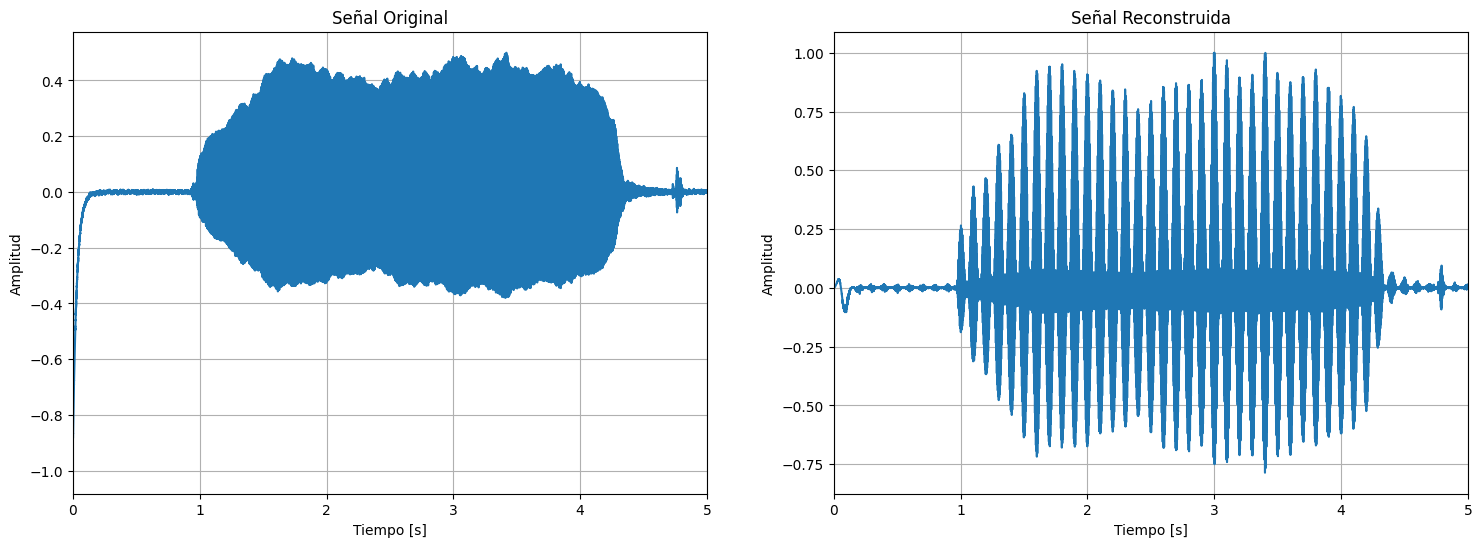

In [29]:
def reconstruir_senal(segmentos_enventanados, P):
    num_segmentos, L = segmentos_enventanados.shape
    paso = int(P)
    senal_reconstruida = np.zeros(num_segmentos * paso + L - paso)

    for i, segmento in enumerate(segmentos_enventanados):
        inicio = i * paso
        fin = inicio + L
        senal_reconstruida[inicio:fin] += segmento

    return senal_reconstruida

senal_reconstruida = reconstruir_senal(segmentos_ventana, P)
audio_duration_ms = len(audio_original) / fs_s * 1000  # Duración del audio en milisegundos.

# Graficar la señal original
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt.plot(np.linspace(0, audio_duration_ms / 1000, num=len(audio_original)), audio_original)
plt.title('Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 5)  # Rango en segundos
plt.grid()

# Graficar la señal reconstruida
senal_reconstruida = senal_reconstruida / max(abs(senal_reconstruida))  # Se normaliza el audio
audio_duration_ms_2 = len(senal_reconstruida) / fs_s * 1000  # Duración del audio en milisegundos.

plt.subplot(1,2,2)
plt.plot(np.linspace(0, audio_duration_ms_2 / 1000, num=len(senal_reconstruida)), senal_reconstruida)
plt.title('Señal Reconstruida')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 5)  # Rango en segundos
plt.grid()

plt.show()

Audio(senal_reconstruida, rate=fs_s)

In [24]:
Audio(audio_original, rate=fs_s)
